<a href="https://colab.research.google.com/github/ebzkurt1/ml_with_jax/blob/main/Perceptron_using_Jax_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import jax
from jax import random
import jax.numpy as jnp
from jax import grad, jit, vmap
import matplotlib.pyplot as plt

In [3]:
# X = jnp.array([[3.0,1.2,3.6],[1.4,6.21,6.8],[1.4,67.3,8.9],[1.4,2.6,1.6]])
X = random.normal(key=random.PRNGKey(42),shape=(100,4))
# y = jnp.array([[1],[2],[3],[2]])
y = jnp.array(
    [
     [0],[0],[2],[1],[2],[0],[1],[2],[2],[1]
    ]
)
class_num = 3
W = random.normal(key=random.PRNGKey(42),shape=(X.shape[-1],class_num))
b = random.normal(key=random.PRNGKey(42),shape=(class_num,1))
# print(b)
# print(jnp.matmul(X,W))
# ff = (jnp.matmul(X,W).T + b).T
# pred = jnp.exp(ff)/jnp.exp(ff).sum(axis=0)
# pred_arg = jnp.argmax(pred,axis=1).reshape(-1,1)
# print(pred_arg)

In [72]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000,n_features=10, centers=3)
X = jnp.asarray(X)
y = jnp.asarray(y).reshape(-1,1)
W = random.normal(key=random.PRNGKey(42),shape=(X.shape[-1],np.unique(y).shape[0]))
b = random.normal(key=random.PRNGKey(42),shape=(np.unique(y).shape[0],1))

X = (X - jnp.mean(X,axis=1).reshape(-1,1))/jnp.std(X,axis=1).reshape(-1,1)

In [73]:
def custom_sigmoid(matrix):
    return (1/(1+jnp.exp(-matrix)))

def custom_softmax(matrix):
    return jnp.exp(matrix)/jnp.sum(jnp.exp(matrix),axis=1).reshape(-1,1)

def forward_pass(X, W, b, activation):
    mm = (jnp.matmul(X, W).T + b).T
    # print("MM",mm)
    mm = (mm - jnp.mean(mm,axis=1).reshape(-1,1))/jnp.std(mm,axis=1).reshape(-1,1)
    # print("MM AFTER",mm)
    # print("MM exp", jnp.exp(mm))
    # print("MAX ", jnp.max(mm,axis=1))
    # print("BEFORE SOFTMAX \n",(jnp.matmul(X, W).T + b).T)
    # print("FORWARD PASS \n",custom_softmax((jnp.matmul(X, W).T + b).T))
    return activation(mm)

def categorical_cross_entropy(yhat,y):
    return -jnp.sum(y*jnp.log(yhat))

def feed_forward(X, Y, W, b, activation):
    Yhat = forward_pass(X,W,b)
    Yhat = activation(Yhat)
    categorical_pred = (jnp.argmax(Yhat,axis=1) + 1).reshape(-1,1)
    return categorical_pred

def loss(X,Y,W,b,loss_fnc, activation):
    Yhat = forward_pass(X,W,b,activation)
    prd = (jnp.argmax(fwd,axis=1)).reshape(-1,1)
    return loss_fnc(Yhat,Y)

for i in range(50):
    print("W after update : ", np.isnan(W).sum())
    print("b after update : ", np.isnan(W).sum())
    fwd = forward_pass(X,W,b,custom_softmax)
    print(fwd)
    prd = (jnp.argmax(fwd,axis=1)).reshape(-1,1)
    lss = categorical_cross_entropy(prd,y)
    step_accuracy = (((prd==y).sum())/X.shape[0])*100
    print("Step accuracy",step_accuracy)
    W_grad = grad(loss,argnums=2)(X,y,W,b,categorical_cross_entropy,custom_softmax)
    # print('W_grad : \n', W_grad)
    print("W_grad nan value num : ", np.isnan(W_grad).sum())
    b_grad = grad(loss,argnums=3)(X,y,W,b,categorical_cross_entropy,custom_softmax)
    # print("b_grad : \n",b_grad)
    print("b_grad nan value num : ", np.isnan(b_grad).sum())
    print("W before update : ", np.isnan(W).sum())
    print("b before update : ", np.isnan(W).sum())
    W -= 0.1*W_grad
    b -= 0.1*b_grad
    # print("W : \n",W)
    # print("b : \n",b)

W after update :  0
b after update :  0
[[0.7802234  0.14826581 0.07151075]
 [0.795965   0.12558196 0.07845296]
 [0.0567133  0.41457665 0.52871007]
 ...
 [0.796628   0.12447157 0.07890042]
 [0.79617673 0.12522984 0.07859348]
 [0.7464574  0.18867871 0.06486399]]
Step accuracy 0.0
W_grad nan value num :  0
b_grad nan value num :  0
W before update :  0
b before update :  0
W after update :  0
b after update :  0
[[0.13408683 0.7905008  0.07541236]
 [0.13633366 0.7889581  0.07470834]
 [0.07834465 0.7957997  0.1258557 ]
 ...
 [0.14047652 0.7860217  0.07350185]
 [0.1454772  0.782337   0.07218578]
 [0.11244056 0.8028204  0.0847391 ]]
Step accuracy 33.3
W_grad nan value num :  0
b_grad nan value num :  0
W before update :  0
b before update :  0
W after update :  0
b after update :  0
[[0.14990954 0.7789596  0.07113082]
 [0.15340869 0.77622813 0.0703631 ]
 [0.08032357 0.7985334  0.12114312]
 ...
 [0.15812944 0.7724624  0.06940824]
 [0.16465311 0.76712435 0.06822252]
 [0.12013733 0.7990831  0.

In [12]:
np.isnan(W_grad).sum()

30

In [ ]:
class Perceptron:
    def __init__(self, class_num=1, activation_func='sigmoid', loss_func='mean_squared_error', learning_rate=0.01, iter=50, random_key=1):
        self.class_num = class_num
        self.activation_func = activation_func
        self.loss_func = loss_func
        self.learning_rate = learning_rate
        self.iter = iter
        self.random_key = random.PRNGKey(random_key)

    def initialize_weights(self, X):
        self.W = random.normal(
            key=self.random_key,
            shape=(X.shape[-1],self.class_num)
        )
        self.b = random.normal(
            key=self.random_key,
            shape=(self.class_num,1)
        )

    def forward(self, X):
        return (jnp.matmul(X, self.W).T + self.b).T

    def softmax_func(self, matrix):
        return jnp.exp(matrix)/jnp.sum(jnp.exp(matrix),axis=1).reshape(-1,1)

    def sigmoid_func(self, matrix):
        return (1/(1+jnp.exp(-matrix)))

    def jax_sigmoid(self, matrix):
        return jax.nn.sigmoid(matrix)
    
    def mean_squared_error(self, Yhat, Y):
        return jnp.mean((Yhat-Y)**2)
        
    def categorical_cross_entropy(self, Yhat, Y):
        return -jnp.sum(Y*jnp.log(Yhat))
    
    def forward_step(self, X, W, b):
        if self.activation_func == 'sigmoid':
            return self.sigmoid_func((jnp.matmul(X, W).T + b).T)
        elif self.activation_func == 'softmax':
            # print("IN FORWARD \n",((jnp.matmul(X, W).T + b).T))
            print("WITH THE SOFT \n",jax.nn.softmax((jnp.matmul(X, W).T + b).T))
            # return self.softmax_func((jnp.matmul(X, W).T + b).T)
            return jax.nn.softmax((jnp.matmul(X, W).T + b).T)
        else:
            return (jnp.matmul(X, W).T + b).T
    
    def loss(self, X, Y, W, b):
        # print(X.shape,Y.shape,W.shape,b.shape)
        Yhat = self.forward_step(X,W,b)
        # print("In loss function \n",Yhat)
        if self.loss_func == 'mean_squared_error':
            return self.mean_squared_error(Yhat, Y)
        elif self.loss_func == 'categorical_cross_entropy':
            return self.categorical_cross_entropy(Yhat,Y)

    def param_update(self, w_gradient, b_gradient):
        self.W -= self.learning_rate * w_gradient
        self.b -= self.learning_rate * b_gradient
    
    def predict(self, X):
        return jnp.argmax(self.forward_step(X,self.W,self.b),axis=1)

    def fit(self, X, Y):
        self.history = {
            'loss':[],
            'accuracy':[]
        }
        self.initialize_weights(X)
        for i in range(self.iter):
            # print(X,Y,self.W,self.b)
            step_loss = self.loss(X, Y, self.W, self.b)
            # print(step_loss)
            step_prediction = self.predict(X).reshape(-1,1)
            step_accuracy = (((step_prediction==Y).sum())/X.shape[0])*100
            self.history['accuracy'].append(step_accuracy)
            self.history['loss'].append(step_loss)
            W_grad = grad(self.loss,argnums=2)(X,Y,self.W,self.b)
            b_grad = grad(self.loss,argnums=3)(X,Y,self.W,self.b)
            self.param_update(W_grad,b_grad)
            print("Epoch",i,"accuracy :",step_accuracy)
            # print(step_loss)
            # print(W_grad)
            # print(b_grad)
            # print(self.W)
        return self.history

In [ ]:
perceptron_model = Perceptron(
    class_num=class_num,
    activation_func='softmax',
    loss_func='categorical_cross_entropy',
)

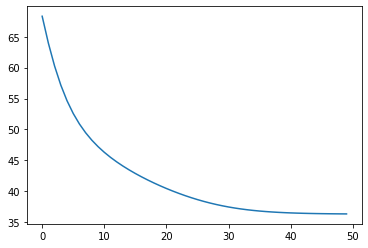

In [ ]:
model_history = perceptron_model.fit(X,y)
plt.plot(model_history['loss'])

In [ ]:
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Train X shapes : ", train_X.shape, type(train_X))
print("Train Y shapes : ", train_Y.shape, type(train_Y))
print("Test X shapes : ", test_X.shape, type(test_X))
print("Test Y shapes : ", test_Y.shape, type(test_Y))

flat_train_X = jnp.asarray(train_X).reshape(-1,28*28)
flat_norm_train_X = flat_train_X/255.0
flat_train_Y = jnp.asarray(train_Y).reshape(-1,1)


flat_test_X = jnp.asarray(test_X).reshape(-1,28*28)
flat_norm_test_X = flat_test_X/255.0
flat_test_Y = jnp.asarray(test_Y).reshape(-1,1)

print("Processed Train X shapes : ", flat_norm_train_X.shape, type(flat_norm_train_X))
print("Processed Train Y shapes : ", flat_train_Y.shape, type(flat_train_Y))
print("Processed Test X shapes : ", flat_norm_test_X.shape, type(flat_norm_test_X))
print("Processed Test Y shapes : ", flat_test_Y.shape, type(flat_test_Y))

Train X shapes :  (60000, 28, 28) <class 'numpy.ndarray'>
Train Y shapes :  (60000,) <class 'numpy.ndarray'>
Test X shapes :  (10000, 28, 28) <class 'numpy.ndarray'>
Test Y shapes :  (10000,) <class 'numpy.ndarray'>
Processed Train X shapes :  (60000, 784) <class 'jaxlib.xla_extension.DeviceArray'>
Processed Train Y shapes :  (60000, 1) <class 'jaxlib.xla_extension.DeviceArray'>
Processed Test X shapes :  (10000, 784) <class 'jaxlib.xla_extension.DeviceArray'>
Processed Test Y shapes :  (10000, 1) <class 'jaxlib.xla_extension.DeviceArray'>


In [ ]:
mnist_perceptron_model = Perceptron(
    class_num=10,
    activation_func='softmax',
    loss_func='categorical_cross_entropy',
    iter=3
)

WITH THE SOFT 
 [[6.41975999e-02 7.72180375e-14 4.40844923e-01 ... 7.25509149e-12
  3.33175086e-03 2.19234789e-06]
 [1.12821253e-05 4.41953924e-15 2.73078695e-12 ... 1.67155872e-12
  5.13250828e-02 4.23662883e-09]
 [5.91588056e-10 1.31975125e-11 4.27631810e-16 ... 7.81825861e-07
  2.30332850e-10 2.73715359e-05]
 ...
 [1.20018827e-04 6.17792661e-09 3.30750964e-07 ... 4.33711648e-05
  1.53182792e-02 2.73711365e-08]
 [3.71682213e-10 4.85025253e-16 5.07619077e-12 ... 6.21370873e-07
  2.71865545e-04 4.64026018e-09]
 [2.05249432e-13 1.14529432e-15 2.50863080e-10 ... 6.78584272e-11
  1.15804432e-04 2.59300936e-08]]
WITH THE SOFT 
 [[6.41975999e-02 7.72180375e-14 4.40844923e-01 ... 7.25509149e-12
  3.33175086e-03 2.19234789e-06]
 [1.12821253e-05 4.41953924e-15 2.73078695e-12 ... 1.67155872e-12
  5.13250828e-02 4.23662883e-09]
 [5.91588056e-10 1.31975125e-11 4.27631810e-16 ... 7.81825861e-07
  2.30332850e-10 2.73715359e-05]
 ...
 [1.20018827e-04 6.17792661e-09 3.30750964e-07 ... 4.33711648e-05


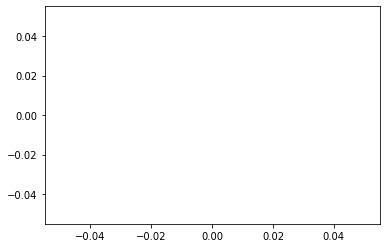

In [ ]:
mnist_history = mnist_perceptron_model.fit(flat_norm_train_X,flat_train_Y)
plt.plot(model_history['accuracy'])

In [ ]:
mnist_perceptron_model.W

DeviceArray([[nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             ...,
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan],
             [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)